In [1]:
!pip install pandas numpy matplotlib seaborn plotly scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.impute import SimpleImputer #This class is used to fill in missing values

%matplotlib inline
sns.set_style('whitegrid') #Changes the default plotting style of Matplotlib to 'seaborn-whitegrid'
sns.set_context('talk')
pd.set_option('display.max_columns', 80) #Tells Pandas to show up to 80 columns when printing a DataFrame
pd.set_option('display.width', 120) #Sets the maximum display width for Pandas DataFrames to 120 characters

In [6]:
df = pd.read_csv('data.csv', encoding='latin1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [7]:
df.shape

(541909, 8)

In [8]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [12]:
# Summary statistics
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
InvoiceNo,541909,25900,573585,1114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StockCode,541909,4070,85123A,2313,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,541909.0,NaN,NaN,NaN,9.55225,218.081158,-80995.0,1.0,3.0,10.0,80995.0
InvoiceDate,541909,23260,10/31/2011 14:41,1114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UnitPrice,541909.0,NaN,NaN,NaN,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,NaN,NaN,NaN,15287.69057,1713.600303,12346.0,13953.0,15152.0,16791.0,18287.0
Country,541909,38,United Kingdom,495478,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Missing values
missing = df.isna().sum().sort_values(ascending=False)
display(missing[missing > 0])

CustomerID     135080
Description      1454
dtype: int64

In [14]:
df_clean = df.copy()
df_clean.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [15]:
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'], dayfirst=True, errors='coerce')

In [16]:
df_clean['Quantity'] = pd.to_numeric(df_clean['Quantity'], errors='coerce').fillna(0).astype(int)
df_clean['UnitPrice'] = pd.to_numeric(df_clean['UnitPrice'], errors='coerce').fillna(0.0)

In [17]:
df_clean['Revenue'] = df_clean['Quantity'] * df_clean['UnitPrice']

In [18]:
df_clean['IsCredit'] = df_clean['InvoiceNo'].str.startswith('C', na=False)

In [19]:
df_clean = df_clean[df_clean['UnitPrice'].notna()]

In [20]:
df_clean['Description'] = df_clean['Description'].str.strip()

In [21]:
df_clean[['InvoiceNo','InvoiceDate','StockCode','Description','Quantity','UnitPrice','Revenue','CustomerID','Country','IsCredit']].head()

,InvoiceNo,InvoiceDate,StockCode,Description,Quantity,UnitPrice,Revenue,CustomerID,Country,IsCredit
0,536365,2010-01-12 08:26:00,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,17850.0,United Kingdom,False
1,536365,2010-01-12 08:26:00,71053,WHITE METAL LANTERN,6,3.39,20.34,17850.0,United Kingdom,False
2,536365,2010-01-12 08:26:00,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,17850.0,United Kingdom,False
3,536365,2010-01-12 08:26:00,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,17850.0,United Kingdom,False
4,536365,2010-01-12 08:26:00,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,17850.0,United Kingdom,False


In [24]:
total_revenue = df_clean['Revenue'].sum()
total_orders = df_clean['InvoiceNo'].nunique()
total_customers = df_clean['CustomerID'].nunique()
total_items_sold = df_clean.loc[df_clean['Quantity']>0,'Quantity'].sum()

print(f"Total revenue: ${total_revenue:,.2f}")
print("Unique invoices:", total_orders)
print("Unique customers (non-null):", total_customers)
print("Total items sold (positive qty):", total_items_sold)

Total revenue: $9,747,747.93
Unique invoices: 25900
Unique customers (non-null): 4372
Total items sold (positive qty): 5660981


In [29]:
print('No. of countries:', df_clean['Country'].value_counts())

No. of countries: Country
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA          

In [30]:
# Revenue by country (top 10)
country_revenue = df_clean.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(10)
display(country_revenue)

Country
United Kingdom    8187806.364
Netherlands        284661.540
EIRE               263276.820
Germany            221698.210
France             197403.900
Australia          137077.270
Switzerland         56385.350
Spain               54774.580
Belgium             40910.960
Sweden              36595.910
Name: Revenue, dtype: float64

## Boxplot (detect outliers) for UnitPrice

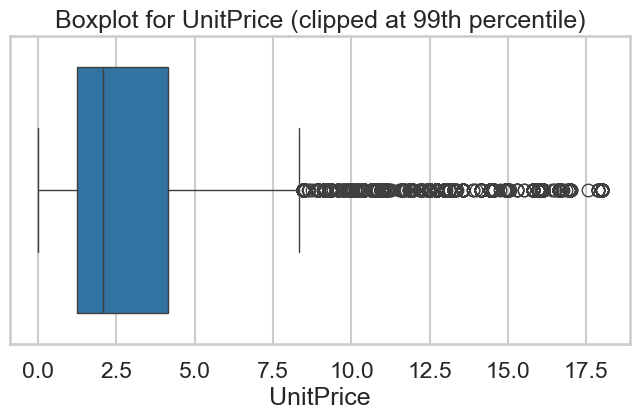

In [34]:
plt.figure(figsize=(8,4))
sns.boxplot(
    x=df_clean['UnitPrice'].clip(lower=0, upper=df_clean['UnitPrice'].quantile(0.99))
)
plt.title('Boxplot for UnitPrice (clipped at 99th percentile)')
plt.xlabel('UnitPrice')
plt.show()

## Scatter: Quantity vs UnitPrice

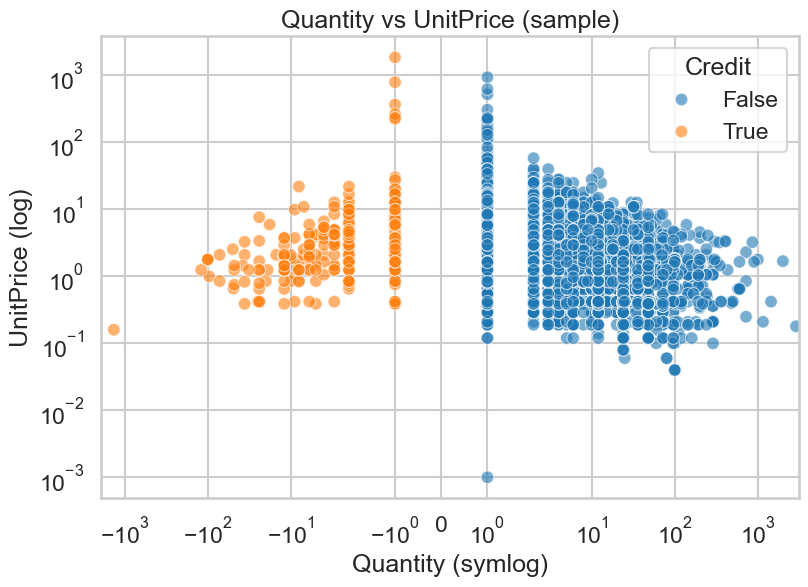

In [37]:
plt.figure(figsize=(9,6))
sample = df_clean.sample(n=20000, random_state=42) if len(df_clean)>20000 else df_clean
sns.scatterplot(x='Quantity', y='UnitPrice', hue='IsCredit', data=sample, alpha=0.6)
plt.xscale('symlog')
plt.yscale('log')
plt.title('Quantity vs UnitPrice (sample)')
plt.xlabel('Quantity (symlog)')
plt.ylabel('UnitPrice (log)')
plt.legend(title='Credit')
plt.show()